# FRACTAL DE MANDELBROT

El fractal de Mandelbrot es una serie iterativa del plano complejo. Se fija un punto C del plano complejo, y se construye la siguiente sucesión:

$ Z_{0} = 0 $

$ Z_{n+1} = Z^{2}_{n} + C $ 

Con 

$ Z = a + bi   $

$ i = \sqrt-1 $

Si la sucesión generada en el punto C está acotada superiormente, la serie no diverge y el punto elegido corresponde al conjunto de Mandelbrot.

In [379]:
# IMPORTS
import matplotlib.pyplot as plt
import numpy as np
import cmath
import math

In [380]:
# iteraciones por punto de información - equivalen a términos de la serie calculados
its = 200

In [381]:
# función recursiva para calcular los términos de la serie
def z(n,c):
    if n == 0: return complex(0)
    return z(n-1, c) ** 2 + c

ALGORITMO PARA CALCULAR EL FRACTAL DE MANDELBROT

1 - Definir los puntos del plano complejo como estables o inestables

2 - Dar a cada punto una ponderación de estabilidad - la iteración en la que la serie diverge (si lo hace)

3 - Representar con el método de escape

MÉTODO DE ESCAPE

Indicar la intensidad de color de los puntos que no pertenecen al conjunto con su velocidad de divergencia en dicho punto. Por ejemplo, rojo indica que al cabo de pocos cálculos se sabe que el punto no está en el conjunto, el blanco informa de que se ha tardado mucho más en comprobarlo y los puntos que sí pertenecen al fractal claramente se representan de negro. Como no se puede calcular un sinfín de valores, es preciso poner un límite y decidir que si los p primeros términos de la sucesión están acotados entonces el punto pertenece al conjunto.

In [382]:
# get_matrices -> devuelve matriz de estabilidad y ponderación de los puntos
def get_matrices():
    npuntos = 500
    # intensidad de desviación
    ponds   = [[0]*npuntos]*npuntos
    # puntos estables
    estables = [[0]*npuntos]*npuntos
    for x in np.linspace(-2,1,npuntos):
        aux = [0]*npuntos
        for y in np.linspace(-1,1,npuntos):
            for n in range(200):
                d, _ = cmath.polar(z(n,complex(x,y)))
                if d > 2:
                    break
            if n == 99:
                estables.append((x,y))
            aux.append(n)
        # normalizamos los valores
        aux = np.array(aux) / max(aux)
        # añadimos los valores a las ponderaciones
        ponds.append(aux)
    return estables, ponds

In [383]:
# get_matrices -> devuelve matriz de estabilidad y ponderación de los puntos de forma optimizada
def get_matrices2():
    npuntos = 1000

    return estables, ponds

In [384]:
estables, ponds = get_matrices()

In [ ]:
plt.imshow(np.transpose(ponds))
plt.rcParams["figure.figsize"] = (20, 24)
plt.show()

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (1000,) + inhomogeneous part.

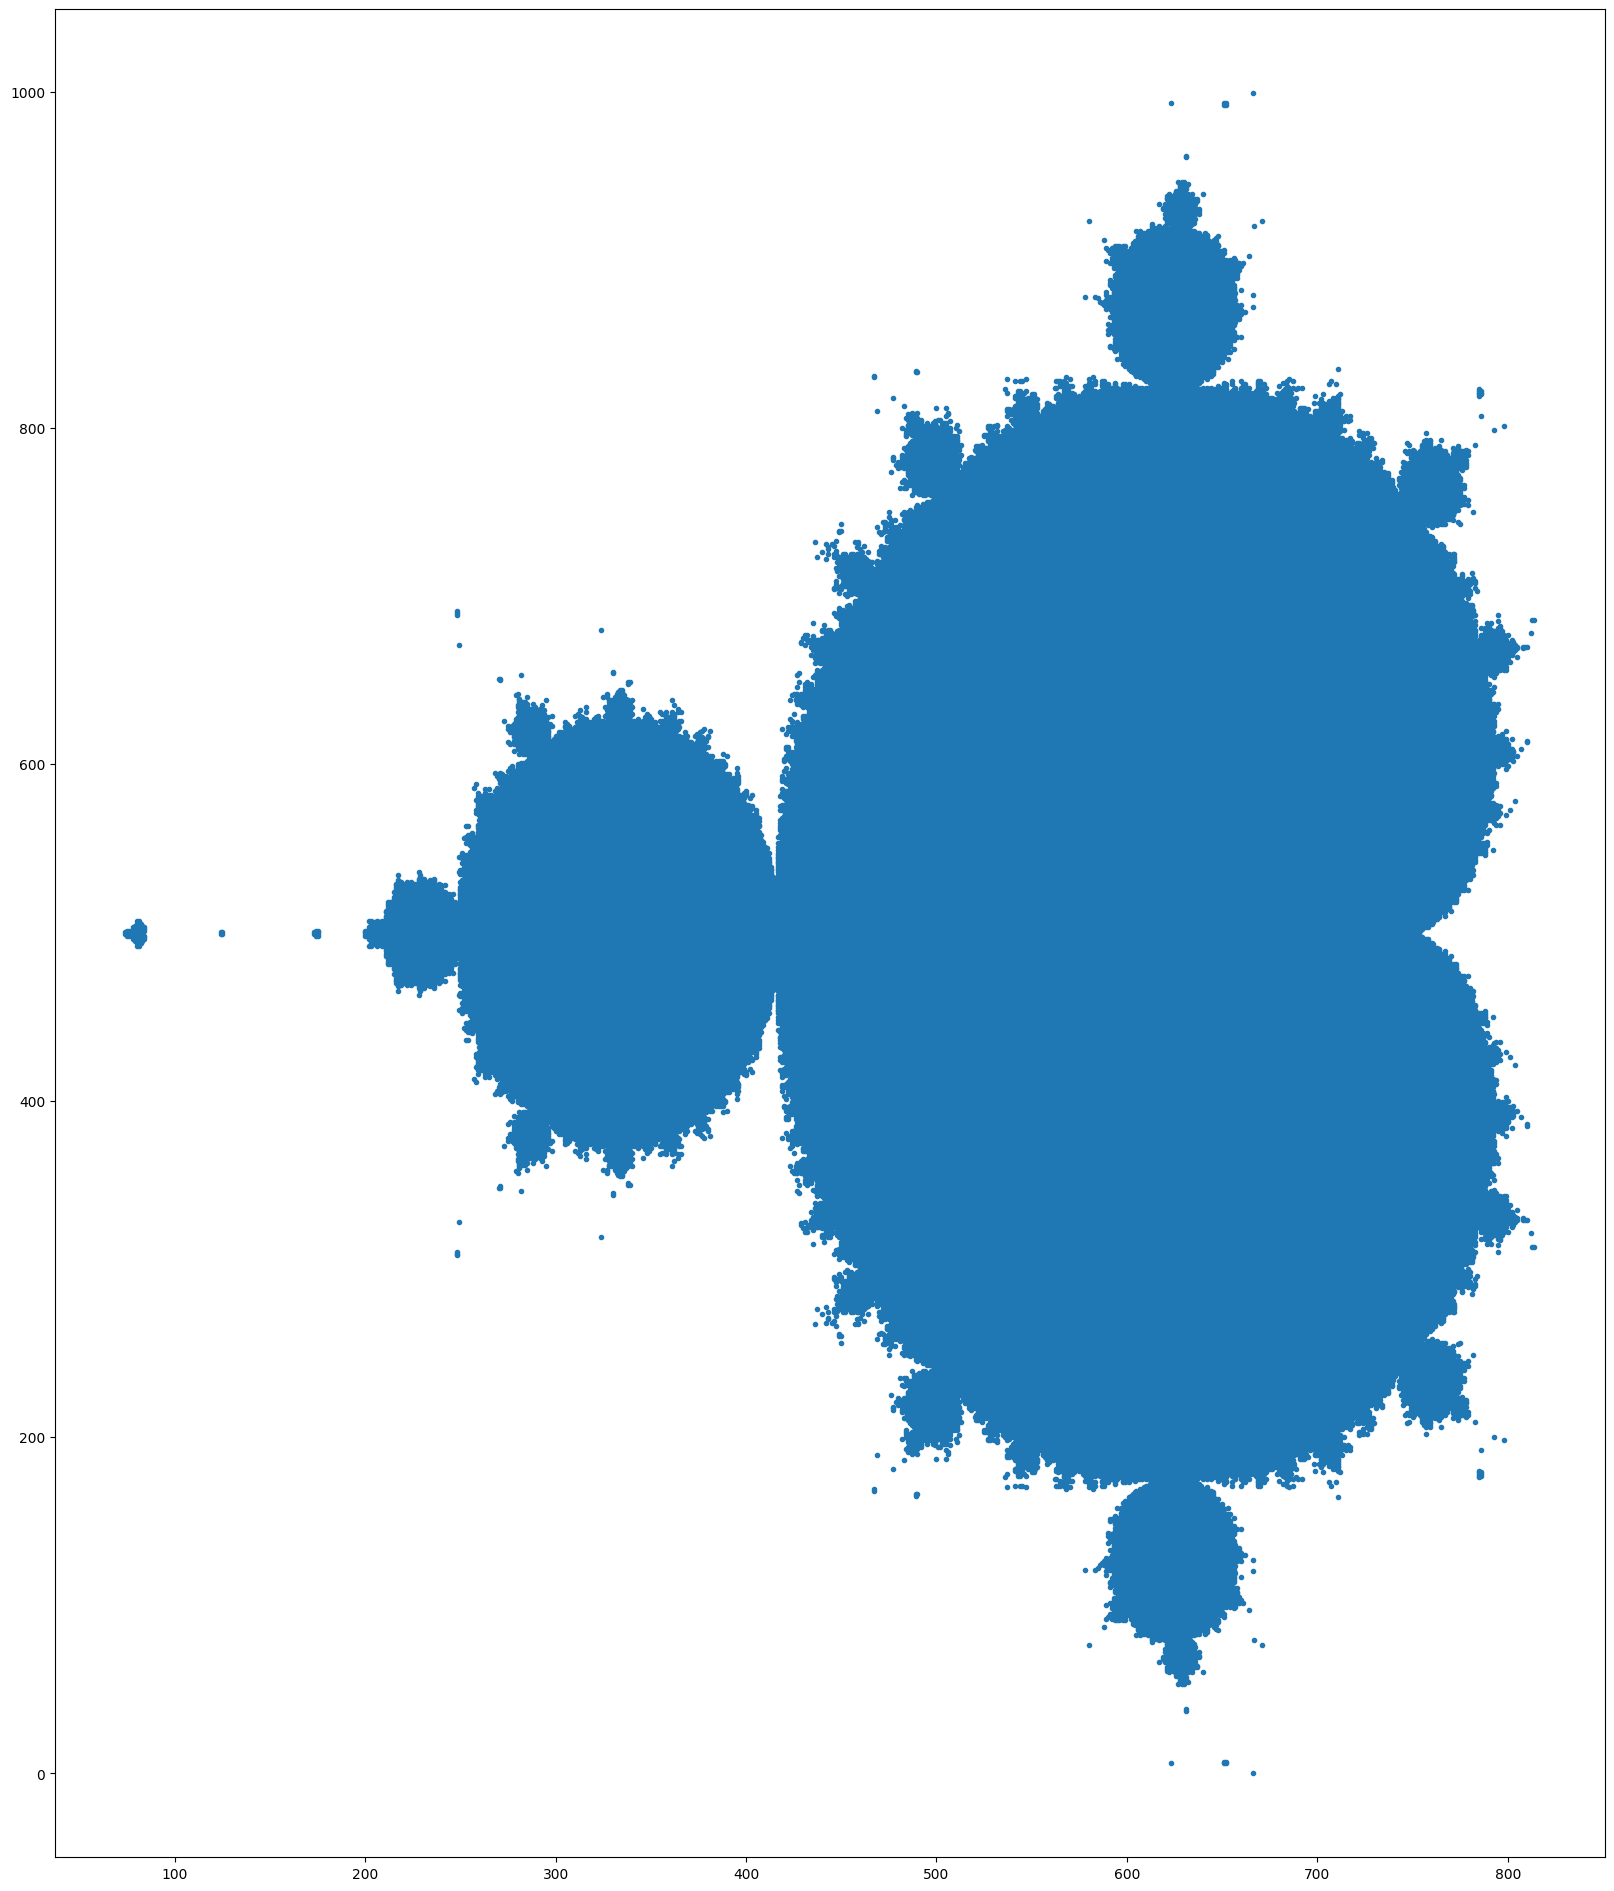

In [ ]:
x = [e[0] for e in estables]
y = [e[1] for e in estables]
plt.plot(x,y,".")
plt.show()